# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries (pandas,numpy, matplotlib etc)

In [1]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv) or from the file appl_1980_2014.csv from the datasets folder.

In [2]:
df=pd.read_csv('D:/Data/Pandas Basic Exercises/2. Pandas Basic Exercises/Exercise Data Files/Pandas Exercise Apple Stock files/appl_1980_2014.csv')

### Step 3. Assign it to a variable apple

In [3]:
apple=df
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [5]:
apple['Date']=pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [6]:
apple=apple.set_index('Date')

### Step 7.  Is there any duplicate dates?

In [7]:
duplicate=apple[apple.duplicated()]
duplicate

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


Step 8.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [11]:
apple=apple.sort_values('Date').reset_index()

Step 9. Get the last business day of each month

In [13]:
apple['month']=pd.DatetimeIndex(apple.Date).month
apple['day']=pd.DatetimeIndex(apple.Date).day
apple.groupby(['month'])['day'].max().reset_index()

,month,day
0,1,31
1,2,29
2,3,31
3,4,30
4,5,31
5,6,30
6,7,31
7,8,31
8,9,30
9,10,31


Step 10.  What is the difference in days between the first day and the oldest

In [14]:
apple.Date.max()-apple.Date.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [16]:
apple['month'].count()

8465

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

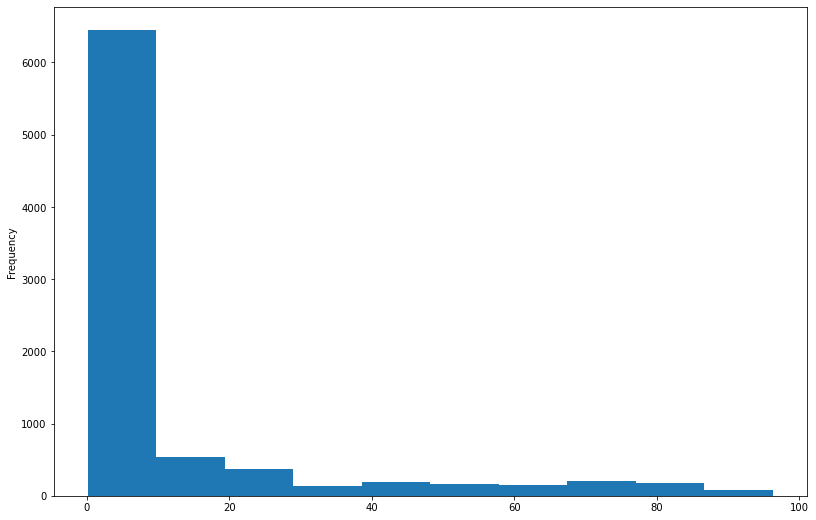

In [19]:
plt.figure(figsize=(13.5,9))
apple['Adj Close'].plot(kind='hist')